In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

from tensorflow.keras.utils import to_categorical
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Reshape, GRU, Conv1D, MaxPooling1D, Bidirectional, ConvLSTM1D
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, MaxPooling1D, BatchNormalization, GlobalAveragePooling1D, Activation
from tensorflow.python.keras.utils import np_utils
from sklearn.metrics import precision_score, recall_score, f1_score

from typing import Any, Dict, List, Tuple
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values



# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


# load the dataset, returns train and test X and y elements
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + "C:/Users/user/Downloads/UCI HAR Dataset/")
    # load all test
    testX, testy = load_dataset_group('test', prefix + "C:/Users/user/Downloads/UCI HAR Dataset/")

    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1

    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

In [7]:
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


In [8]:
print("X train shape: ", trainX.shape)
print("Y train shape: ", trainy.shape)
print("Y train One hot shape: ", trainy_one_hot.shape)
print("X test shape: ", testX.shape)
print("Y test shape: ", testy.shape)
print("Y test One hot shape: ", testy_one_hot.shape)

X train shape:  (7352, 128, 9)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 9)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [9]:
print("0: Walking:" ,np.where(trainy == 0)[0].size)
print("1: WU:" ,np.where(trainy == 1)[0].size)
print("2: WD:" ,np.where(trainy == 2)[0].size)
print("3: Sitting:" ,np.where(trainy == 3)[0].size)
print("4: Standing:" ,np.where(trainy == 4)[0].size)
print("5: Laying:" ,np.where(trainy == 5)[0].size)

0: Walking: 1226
1: WU: 1073
2: WD: 986
3: Sitting: 1286
4: Standing: 1374
5: Laying: 1407


In [10]:
unique, counts = np.unique(trainy, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)

unique, counts = np.unique(testy, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]
 [   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]
 [  3 491]
 [  4 532]
 [  5 537]]


In [11]:
X_train_all = trainX   # at this stage, the data includes both dynamic and static HAR data
y_train_all = trainy

X_test_all = testX
y_test_all = testy
     

In [12]:
trainy_one_hot = to_categorical(trainy)
testy_one_hot = to_categorical(testy)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.3,random_state=100)
 

In [14]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy_one_hot.shape[1]

In [ ]:
#GRU1

In [15]:
# Model 1
model = Sequential()
model.add(GRU(128, input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        53,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,662 (276.02 KB)

 Trainable params: 70,662 (276.02 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)


Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 43s 750ms/step - accuracy: 0.7332 - loss: 0.5878 - val_accuracy: 0.8033 - val_loss: 0.4356
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 44s 756ms/step - accuracy: 0.8170 - loss: 0.4236 - val_accuracy: 0.8835 - val_loss: 0.3050
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 44s 766ms/step - accuracy: 0.8814 - loss: 0.3072 - val_accuracy: 0.9297 - val_loss: 0.2009
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 45s 778ms/step - accuracy: 0.9111 - loss: 0.2317 - val_accuracy: 0.9438 - val_loss: 0.1613
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 47s 808ms/step - accuracy: 0.9311 - loss: 0.1765 - val_accuracy: 0.9343 - val_loss: 0.1446
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 48s 821ms/step - accuracy: 0.9417 - loss: 0.1552 - val_accuracy: 0.9515 - val_loss: 0.1313
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 49s 838ms/step - accuracy: 0.9413 - loss: 0.1549 - val_accuracy: 0.9519 - val_loss: 0.1241
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 49s 839ms/step - accuracy: 0.9435 - loss: 0.1459 - val_accu

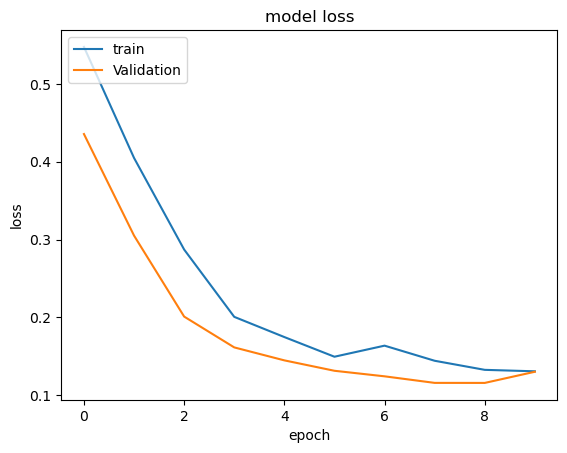

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

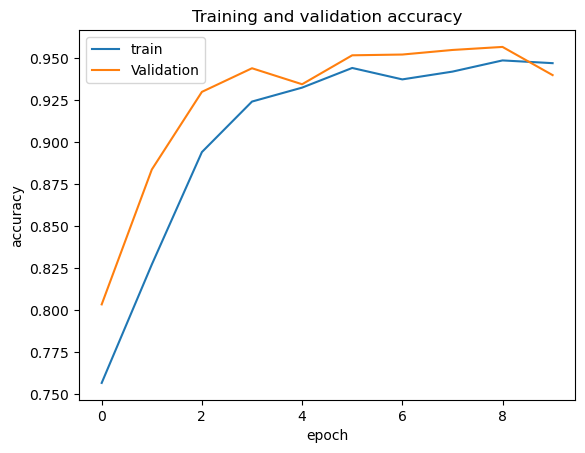

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step
[[463  28   5   0   0   0]
 [ 25 424  22   0   0   0]
 [  3   0 417   0   0   0]
 [  1   9   0 349 132   0]
 [  6   1   0  43 482   0]
 [  0   0   0   0   0 537]]
0.9066847641669494
0.9054005966783458
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       496
           1       0.92      0.90      0.91       471
           2       0.94      0.99      0.97       420
           3       0.89      0.71      0.79       491
           4       0.79      0.91      0.84       532
           5       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



<Axes: >

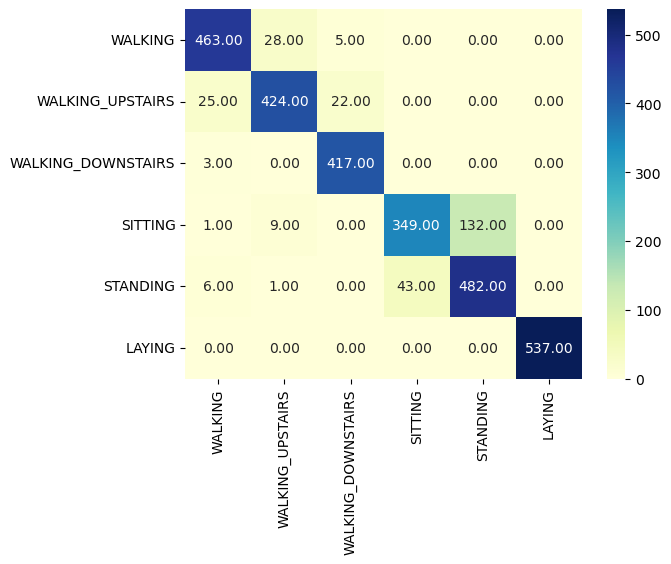

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDING','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [ ]:
#GRU 2

In [40]:
# Model 1
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5))

model.add(GRU(128))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_12 (GRU)                    │ (None, 128, 128)       │        53,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_13 (GRU)                    │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,734 (663.02 KB)

 Trainable params: 169,734 (663.02 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)

   

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.4119 - loss: 1.4436 - val_accuracy: 0.5780 - val_loss: 1.0043
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.6029 - loss: 0.9353 - val_accuracy: 0.7189 - val_loss: 0.6656
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.7359 - loss: 0.6368 - val_accuracy: 0.8490 - val_loss: 0.4043
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.8417 - loss: 0.3948 - val_accuracy: 0.8962 - val_loss: 0.2603
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - accuracy: 0.9089 - loss: 0.2333 - val_accuracy: 0.9189 - val_loss: 0.1945
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 199ms/step - accuracy: 0.9251 - loss: 0.1941 - val_accuracy: 0.9261 - val_loss: 0.1724
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 200ms/step - accuracy: 0.9417 - loss: 0.1455 - val_accuracy: 0.9356 - val_loss: 0.1426
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 201ms/step - accuracy: 0.9434 - loss: 0.1449 - val_accu

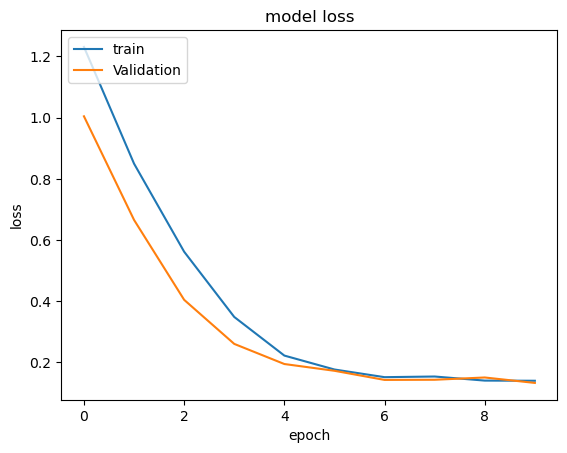

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
     

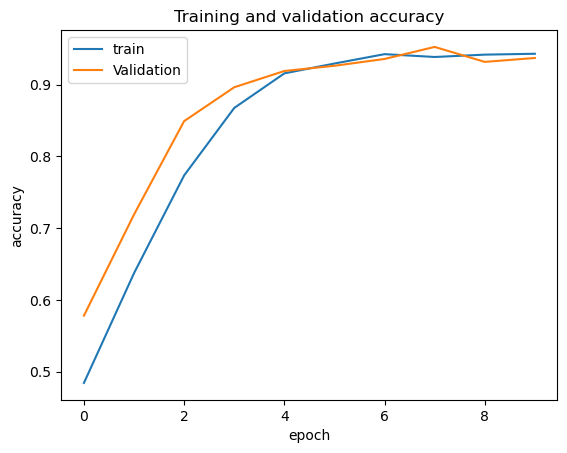

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
[[456   5  35   0   0   0]
 [  5 442  24   0   0   0]
 [  2   6 412   0   0   0]
 [ 15   7   0 330 139   0]
 [  9   0   0  41 482   0]
 [  0  27   0   0   0 510]]
0.8931116389548693
0.8914477176644485
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       496
           1       0.91      0.94      0.92       471
           2       0.87      0.98      0.92       420
           3       0.89      0.67      0.77       491
           4       0.78      0.91      0.84       532
           5       1.00      0.95      0.97       537

    accuracy                           0.89      2947
   macro avg       0.90      0.89      0.89      2947
weighted avg       0.90      0.89      0.89      2947



<Axes: >

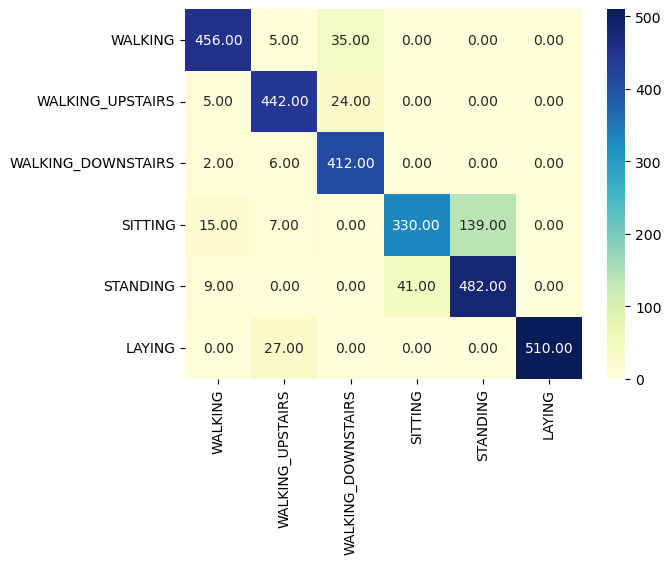

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDING','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [ ]:
#GRU 3

In [45]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)

 

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - accuracy: 0.9478 - loss: 0.1320 - val_accuracy: 0.9311 - val_loss: 0.1433
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - accuracy: 0.9424 - loss: 0.1398 - val_accuracy: 0.9044 - val_loss: 0.2360
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 302ms/step - accuracy: 0.9413 - loss: 0.1460 - val_accuracy: 0.9565 - val_loss: 0.1158
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 303ms/step - accuracy: 0.9469 - loss: 0.1334 - val_accuracy: 0.9365 - val_loss: 0.1273
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - accuracy: 0.9473 - loss: 0.1305 - val_accuracy: 0.9583 - val_loss: 0.1095
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 298ms/step - accuracy: 0.9555 - loss: 0.1170 - val_accuracy: 0.9456 - val_loss: 0.1106
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - accuracy: 0.9457 - loss: 0.1217 - val_accuracy: 0.9560 - val_loss: 0.1065
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 17s 301ms/step - accuracy: 0.9490 - loss: 0.1234 - val_accu

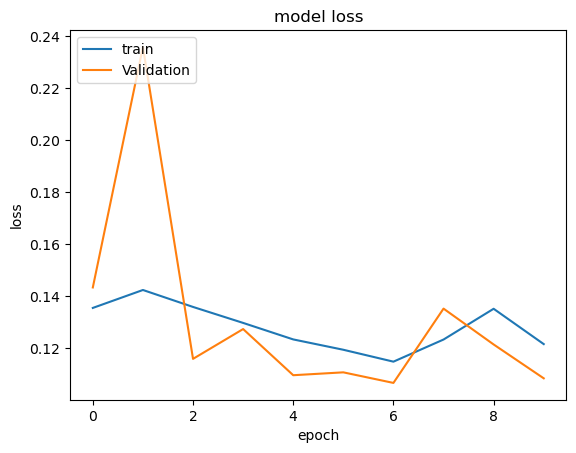

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

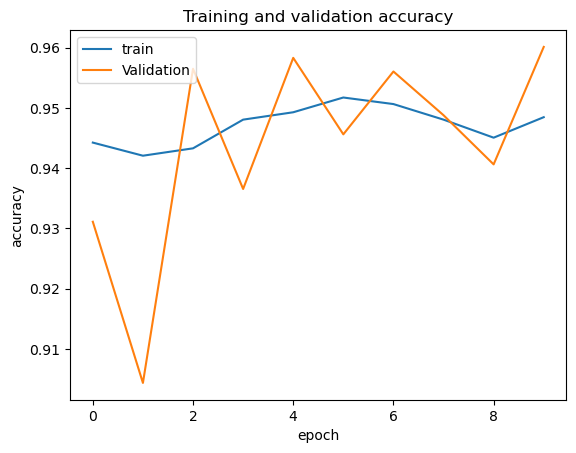

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
[[461   8  27   0   0   0]
 [  5 448  18   0   0   0]
 [  1   2 417   0   0   0]
 [  0   4   0 402  85   0]
 [  2   1   0 108 421   0]
 [  0  27   0   0   0 510]]
0.9022734984730234
0.9023585459075204
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       496
           1       0.91      0.95      0.93       471
           2       0.90      0.99      0.95       420
           3       0.79      0.82      0.80       491
           4       0.83      0.79      0.81       532
           5       1.00      0.95      0.97       537

    accuracy                           0.90      2947
   macro avg       0.90      0.91      0.90      2947
weighted avg       0.90      0.90      0.90      2947



<Axes: >

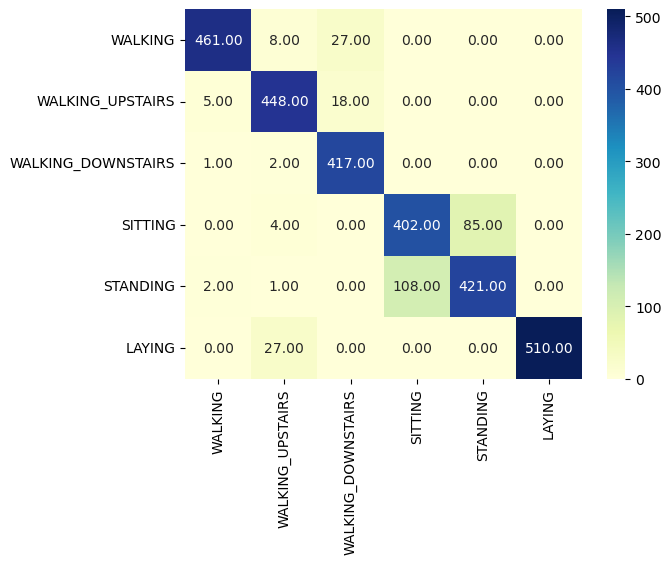

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDING','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [ ]:
#GRU 4

In [49]:
# Model 1
model = Sequential()
model.add(GRU(128, return_sequences=True , input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5))

model.add(GRU(128, return_sequences=True ))
model.add(Dropout(0.5))

model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(128))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_14 (GRU)                    │ (None, 128, 128)       │        53,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_15 (GRU)                    │ (None, 128, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_16 (GRU)                    │ (None, 128, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_17 (GRU)                    │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,878 (1.40 MB)

 Trainable params: 367,878 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)

  

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 50s 806ms/step - accuracy: 0.3778 - loss: 1.4539 - val_accuracy: 0.5589 - val_loss: 1.0077
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 786ms/step - accuracy: 0.5715 - loss: 0.9924 - val_accuracy: 0.7208 - val_loss: 0.6602
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 786ms/step - accuracy: 0.7326 - loss: 0.5863 - val_accuracy: 0.8422 - val_loss: 0.3747
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 45s 780ms/step - accuracy: 0.8422 - loss: 0.3776 - val_accuracy: 0.9202 - val_loss: 0.1966
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 45s 776ms/step - accuracy: 0.9175 - loss: 0.2135 - val_accuracy: 0.9107 - val_loss: 0.2067
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 789ms/step - accuracy: 0.9378 - loss: 0.1755 - val_accuracy: 0.9533 - val_loss: 0.1302
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 786ms/step - accuracy: 0.9337 - loss: 0.1669 - val_accuracy: 0.9297 - val_loss: 0.1601
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 52s 892ms/step - accuracy: 0.9238 - loss: 0.1923 - val_accu

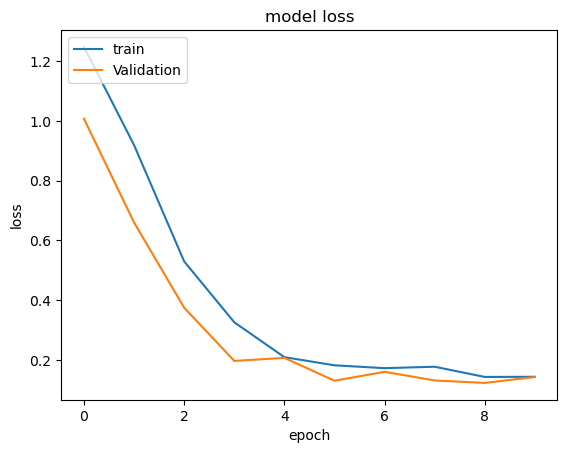

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

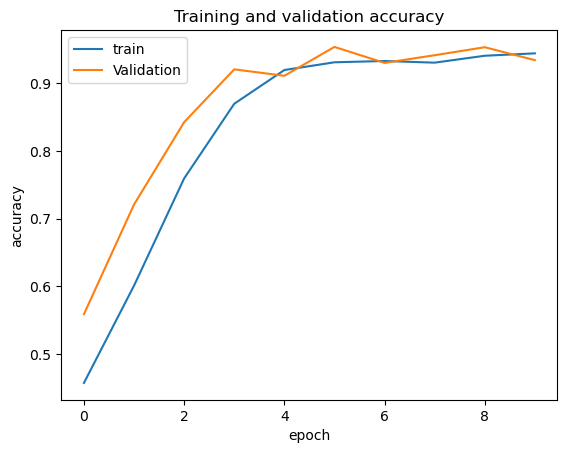

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
[[446  35  14   0   1   0]
 [ 12 447  12   0   0   0]
 [  0  11 409   0   0   0]
 [  4   3   3 300 181   0]
 [  2   0   0  31 499   0]
 [  0   0  26   0   0 511]]
0.8863250763488293
0.8838579389891431
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       496
           1       0.90      0.95      0.92       471
           2       0.88      0.97      0.93       420
           3       0.91      0.61      0.73       491
           4       0.73      0.94      0.82       532
           5       1.00      0.95      0.98       537

    accuracy                           0.89      2947
   macro avg       0.90      0.89      0.88      2947
weighted avg       0.90      0.89      0.88      2947



<Axes: >

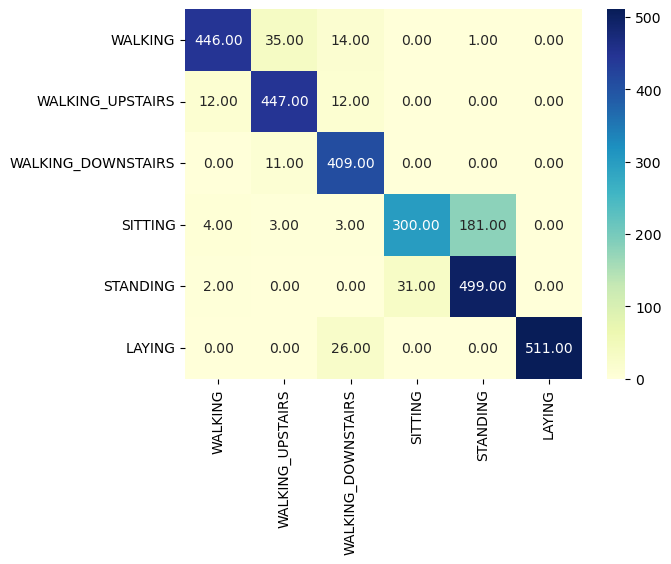

In [53]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDING','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

In [ ]:
#GRU5

In [54]:
# Model 1
model = Sequential()
model.add(GRU(128, return_sequences=True , input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5))

model.add(GRU(128, return_sequences=True ))
model.add(Dropout(0.5))

model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.5))

model.add(GRU(128, return_sequences=True))
model.add(Dropout(0.5))

model.add(GRU(128))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))

model.add(Dense(n_outputs, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_18 (GRU)                    │ (None, 128, 128)       │        53,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_19 (GRU)                    │ (None, 128, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_20 (GRU)                    │ (None, 128, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_21 (GRU)                    │ (None, 128, 128)       │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_22 (GRU)                    │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466,950 (1.78 MB)

 Trainable params: 466,950 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(trainX, trainy_one_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_one_hot), shuffle=True)

     

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.4235 - loss: 1.3779 - val_accuracy: 0.5553 - val_loss: 0.9982
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.5656 - loss: 0.9761 - val_accuracy: 0.7403 - val_loss: 0.6382
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7168 - loss: 0.6201 - val_accuracy: 0.8001 - val_loss: 0.4251
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.8153 - loss: 0.4212 - val_accuracy: 0.8595 - val_loss: 0.3483
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8704 - loss: 0.3352 - val_accuracy: 0.9225 - val_loss: 0.2088
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.9237 - loss: 0.2082 - val_accuracy: 0.9252 - val_loss: 0.2347
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9247 - loss: 0.2028 - val_accuracy: 0.9352 - val_loss: 0.1431
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.9469 - loss: 0.1368 - val_accuracy: 0.9515 - val_loss:

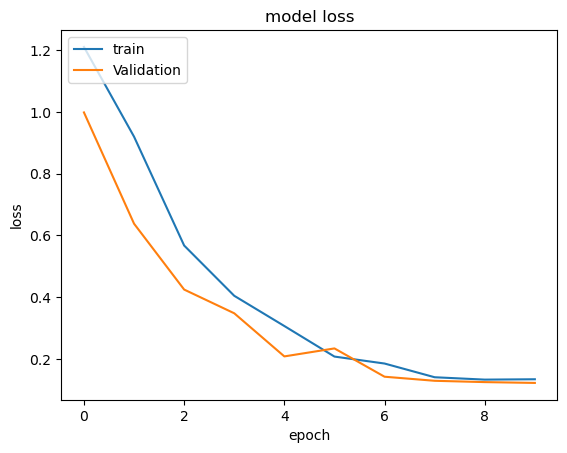

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
     

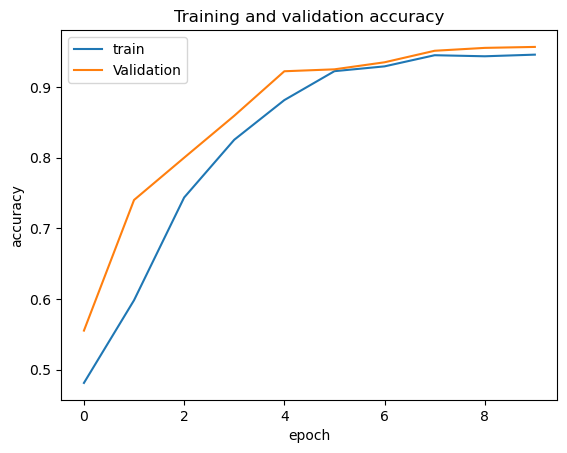

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step
[[458  10  28   0   0   0]
 [ 19 426  26   0   0   0]
 [  0   0 420   0   0   0]
 [ 22   2   1 394  71   1]
 [  8   1   0 111 412   0]
 [  0   0   0   0   0 537]]
0.8982015609093994
0.8975226333173288
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       496
           1       0.97      0.90      0.94       471
           2       0.88      1.00      0.94       420
           3       0.78      0.80      0.79       491
           4       0.85      0.77      0.81       532
           5       1.00      1.00      1.00       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.90      0.90      0.90      2947



<Axes: >

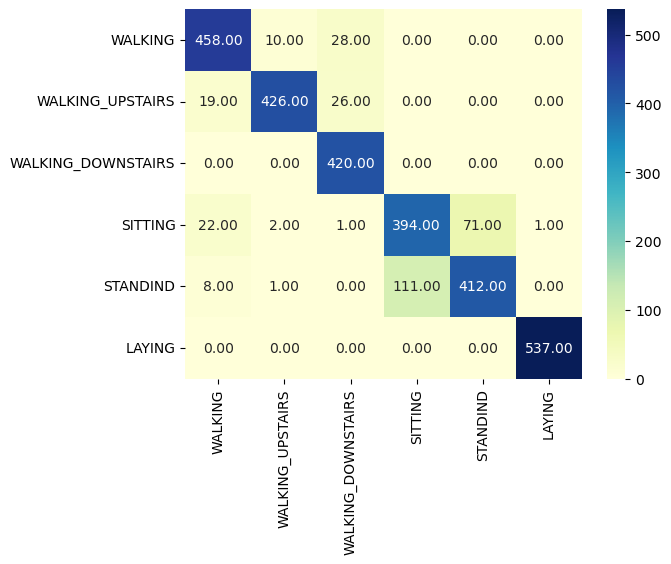

In [58]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

predy=model.predict(testX)
predy=np.argmax(predy, axis=-1)
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS', 'SITTING','STANDIND','LAYING']
cm=confusion_matrix(testy,predy)
print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')